In [1]:
#### specify path of Julia Code for 2D Models ####
### By default the working directory ./2D_Models ###
path = string( pwd(), "/2D_Models/")

"/home/jakob/Dokumente/Repositories/Modeling_Framework/2D_Models/"

In [2]:
##### include 2D Modelling Framework ####
include(string(path, "./2D_model_library.jl"));


########## OPERATIONAL ##########
##### how to chose the actual velocity? #####

#op_model = "Constant"
#op_model = "Collision_Free_Speed"
#op_model = "Collision_Free_Speed_XU"
#op_model = "RVO"
#op_model = "SocialForce"
#op_model = "AV_Model"
#op_model = "AV_IN_Model"
#op_model = "PowerLaw"
#op_model = "IN_Costfunction"
#op_model = "IN_Model"
#op_model = "SocialForce"
#op_model = "SocialForce_Elliptical_A"
op_model = "SocialForce_Elliptical_B"
#op_model = "SocialForce_CollisionPrediction"
#op_model = "SocialForce_Rotation"
#op_model = "Centrifugal_Force"
#op_model = "Generalized_Centrifugal_Force"


include_op_model(op_model, path)

########## TACTICAL ##########
#### how to chose the preferred velocity? ###

tact_model = "Constant"
#tact_model = "IN_Model"

include_tact_model(tact_model, path)


########## STRATEGIC ##########
### how to chose the desired velocity ###

strat_model = "Constant"
#strat_model = "Towards_Goal"
#strat_model = "Two_Goals"


include_strat_model(strat_model, path)


########## OPTIMIZATION SCHEME ##########
### If optimization of a cost-function is included, how to solve? ###

#optimization_scheme = "Regular_Sampling"
optimization_scheme = "Random_Sampling"

include_optimization_scheme(optimization_scheme, path)


##### which update scheme? #####

update = "Parallel_Update"
#update = "Step_Update"

include_update(update, path)


##### which order? i.e. Acceleration or Velocity based? ####
#order = "first"
order = "second"

include_order(order, path)


##### PERCEPTIONAL MODEL ####
perception_model = "None"
#perception_model = "Only_in_Front"

include_perception_model(perception_model, path)

The following parameters were given in zanlungo_SocialForceModel_2011:
[2.0, 1.7, 0.0, 0.0, 0.0, 0.0, 1.74, 1.2, 0.67, 0.0, 0.0, 0.0, 0.62, 0.19]
v_max, v_des, T, T2, l, step_time, τ_A, τ_R, α, β, ζ_h, ζ_v, r, λ


14-element Vector{Float64}:
 2.0
 1.7
 0.0
 0.0
 0.0
 0.0
 1.74
 1.2
 0.67
 0.0
 0.0
 0.0
 0.62
 0.19

In [51]:
### of the system ###
N = 2
system_size = (100.0, 100.0) #important for periodic boundaries
p = [2.0, 0.0, 0.0, 0.0, 0.3, 0.0, 1.74, 1.2, 0.67, 0.0, 0.0, 0.0, 0.62, 0.19]
#[2.0, 1.7, 3.0, 0.0, 0.3, 0.0, 0.0, 0.5, 0.33, 0.0, 0.0, 0.0, 0.0, 0.0]
# ModelParameter: v_max, v_des, T, T2, l, step_time, τ_A, τ_R, α, β, ζ_h, ζ_v, r, λ

### initialize geometry ###
geometrie = create_geometry_single_obstacle((37.5,31.5), 0.3)

### initialize crowd ###
menge = create_crowd(N, geometrie);
Init_Hom_Parameters!(p, menge)

a = menge.agent[1]
b = menge.agent[2];
b.vel = 1.0
b.heading = normalize((-1.0, 0.0))
b.pos = (0.0001, 0.0001)

a.v_des = 0.0
a.vel = 0.0
a.heading = normalize((1.0, 0.0))
a.e_pref = a.heading


Update_Neighborhood!(menge, geometrie, system_size, 5.0)

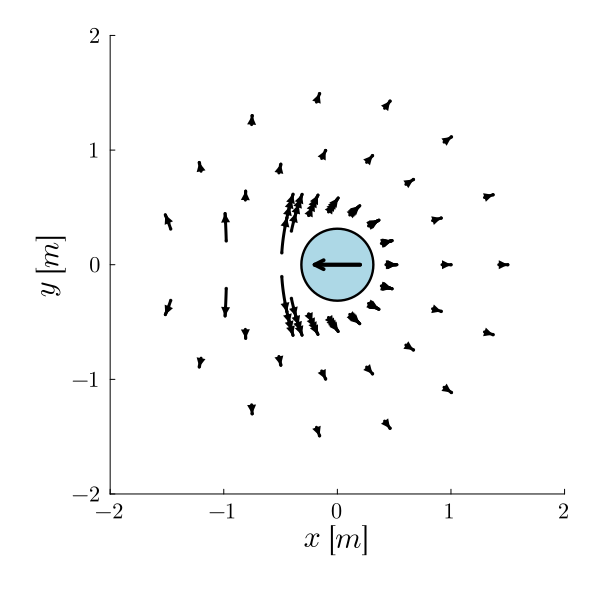

In [55]:
using Plots
using LaTeXStrings, ColorSchemes

Plots.scalefontsizes()
Plots.scalefontsizes(2)
GR.setarrowsize(1)

plot(layout=(1,1), legend=:topleft, legendfontsize = 15, grid = false,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

Δϕ = 2π / 15
k = 100

r = 0.5
p_s_start = [r .* (cos(ϕ), sin(ϕ)) for ϕ in 0:Δϕ:2π-Δϕ]

for p in p_s_start
    
        scatter!(p, label =:false,  markersize=2, msw=0, alpha = 0.5, color =:black)

    
    field_line = Calculate_Field_Line(a, menge, geometrie, p, 500, system_size);
    
    
    for i in 1:k:length(field_line)-k
        plot!(field_line[i:i+k], linewidth = 3, arrow=(:closed, 2.0), color =:black, label=false, alpha = 1.0)
    end
    
end

r = 1.0
p_s_start = [r .* (cos(ϕ), sin(ϕ)) for ϕ in 0:Δϕ:2π-Δϕ]

for p in p_s_start
    
        scatter!(p, label =:false,  markersize=2, msw=0, alpha = 0.5, color =:black)

    
    field_line = Calculate_Field_Line(a, menge, geometrie, p, 200, system_size);
    
    
    for i in 1:k:length(field_line)-k
        plot!(field_line[i:i+k], linewidth = 3, arrow=(:closed, 2.0), color =:black, label=false, alpha = 1.0)
    end
    
end

r = 1.5
p_s_start = [r .* (cos(ϕ), sin(ϕ)) for ϕ in 0:Δϕ:2π-Δϕ]

for p in p_s_start
    
        scatter!(p, label =:false,  markersize=2, msw=0, alpha = 0.5, color =:black)

    
    field_line = Calculate_Field_Line(a, menge, geometrie, p, 200, system_size);
    
    
    for i in 1:k:length(field_line)-k
        plot!(field_line[i:i+k], linewidth = 3, arrow=(:closed, 2.0), color =:black, label=false, alpha = 1.0)
    end
    
end


#plot intruder
scatter!((0.0, 0.0), label =:false,  markersize=40, msw=2, alpha = 1.0, color =:lightblue)
#scatter!((0.0, l(a, b)), label =:false,  markersize=5, msw=0, alpha = 1.0, color =:black)

b_vel = -1 .*Δv(a, b)
quiver!([0.2], [0.0], quiver = 0.4.*([b_vel[1]], [b_vel[2]]), color =:black, linewidth=3.8, thickness_scaling = 1)



plot!(xlabel=L"$x$ $[m]$")
plot!(ylabel=L"$y$ $[m]$")

x_min, x_max = -2, 2
y_min, y_max = -2, 2

x_ticks = collect(x_min:1:x_max)
y_ticks = collect(y_min:1:y_max)

plot!(yticks=(x_ticks, Create_LaTeXString(x_ticks)))
plot!(xticks=(y_ticks, Create_LaTeXString(y_ticks)))

plot!(xlims = [x_min, x_max])
plot!(ylims = [y_min, y_max])

plot!(size=(600,600), margin = 0.7Plots.cm)
#savefig("/home/jakob/Dokumente/Field_Lines_SocialForces_Ellipse.png")

In [46]:
function Calculate_Field_Line(a::agent, menge::crowd, geometrie, p_start, N, system_size, dt = 0.01)
    
    field_line = fill((0.0, 0.0), N)
    
    a.pos = p_start
    field_line[1] = a.pos
        
    for i in 2:N       
        
        a_heading, a_vel = Calc_Heading_Velocity(a, menge, geometrie, system_size)
        a_vel = min(a_vel, a.v_max)
        a.pos = a.pos .+ a_heading .* a_vel .* dt
        field_line[i] = a.pos
    
    end
    
    field_line
    
end 

Calculate_Field_Line (generic function with 2 methods)

In [44]:
a.v_pref

0.0

In [45]:
a.e_pref

(1.0, 0.0)

In [4]:
function Calculate_Direction_Matrix(a::agent, b::agent, menge::geometry, system_size, x_values, y_values)

    Grid_x = fill(0.0, length(x_values)*length(y_values))
    Grid_y = copy(Grid_x)
    
    v_x = copy(Grid_x)
    v_y = copy(Grid_x)

    counter = 1

    for (i, x) in enumerate(x_values)

        for (j, y) in enumerate(y_values)

            a.pos = (x, y)

            if d(a, b) >= l(a, b)+0.05

                e_opt, v_opt = Calc_Heading_Velocity(a, menge, geometrie, system_size)
                gradient = e_opt .* v_opt


            end

            Grid_x[counter] = x
            Grid_y[counter] = y

            counter = counter + 1

        end
    end
    
    Grid_x, Grid_y, gradient
    
end

Calculate_Direction_Matrix (generic function with 1 method)